In [1]:
import pandas as pd
import numpy as np
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


In [2]:
def load_data(file_path):
    logging.info(f"Loading data from {file_path}")
    return pd.read_csv(file_path)

exoplanet_data = load_data('Calculated_Nulls.csv')


2024-10-26 19:06:38,234 - INFO - Loading data from Calculated_Nulls.csv


In [3]:
def check_nulls(df):
    null_counts = df.isnull().sum()
    logging.info("Null value counts in the DataFrame:")
    logging.info(null_counts)
    return null_counts

null_counts = check_nulls(exoplanet_data)


2024-10-26 19:06:38,293 - INFO - Null value counts in the DataFrame:
2024-10-26 19:06:38,294 - INFO - Unnamed: 0                                 0
Planet Name                                0
Planet Letter                              0
Host Star Name                             0
Orbital Period                            10
Orbital Eccentricity                     837
Orbital Inclination                     1416
Planet Radius (Earth Radii)               21
Planet Density                           104
Equilibrium Temperature                  434
Insolation Flux                          983
Transit Depth                            283
Transit Duration                        1528
Star Mass                                  7
Effective Temperature                    244
Star Luminosity                          260
Star Radius                              266
Star Age                                1247
Metallicity                              482
Distance                                  2

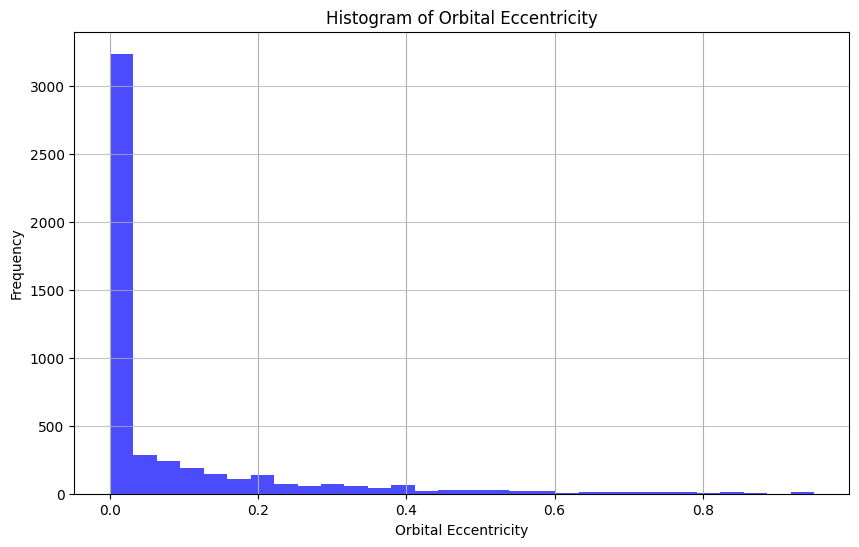

In [4]:
import matplotlib.pyplot as plt

# Plotting the histogram for Orbital Eccentricity
plt.figure(figsize=(10, 6))
exoplanet_data['Orbital Eccentricity'].hist(bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Orbital Eccentricity')
plt.xlabel('Orbital Eccentricity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [5]:
def fill_eccentricity(df):
    """Fill Orbital Eccentricity NaN values with 0."""
    df['Orbital Eccentricity'].fillna(0, inplace=True)
    logging.info("Filled Orbital Eccentricity NaN values with 0.")
    return df


In [6]:
def save_data(df, file_path):
    """Save the DataFrame to a CSV file."""
    df.to_csv(file_path, index=False)
    logging.info(f"Data saved to {file_path}")

In [7]:
def fill_inclination(df):
    mean_inclination = df['Orbital Inclination'].mean()
    df['Orbital Inclination'] = df['Orbital Inclination'].fillna(mean_inclination)
    logging.info(f'Filled missing Orbital Inclination with mean: {mean_inclination}')

def fill_transit_duration(df):
    median_duration = df['Transit Duration'].median()
    df['Transit Duration'] = df['Transit Duration'].fillna(median_duration)
    logging.info(f'Filled missing Transit Duration with median: {median_duration}')

def fill_star_age(df):
    median_age = df['Star Age'].median()
    df['Star Age'] = df['Star Age'].fillna(median_age)
    logging.info(f'Filled missing Star Age with median: {median_age}')

def fill_planet_density(df):
    median_value = df['Planet Density'].median()
    df['Planet Density'] = df['Planet Density'].fillna(median_value)
    logging.info(f'Filled missing Planet Density with median: {median_value}')

def fill_equilibrium_temperature(df):
    median_value = df['Equilibrium Temperature'].median()
    df['Equilibrium Temperature'] = df['Equilibrium Temperature'].fillna(median_value)
    logging.info(f'Filled missing Equilibrium Temperature with median: {median_value}')

def fill_insolation_flux(df):
    median_value = df['Insolation Flux'].median()
    df['Insolation Flux'] = df['Insolation Flux'].fillna(median_value)
    logging.info(f'Filled missing Insolation Flux with median: {median_value}')

def fill_transit_depth(df):
    median_value = df['Transit Depth'].median()
    df['Transit Depth'] = df['Transit Depth'].fillna(median_value)
    logging.info(f'Filled missing Transit Depth with median: {median_value}')

def fill_star_mass(df):
    median_value = df['Star Mass'].median()
    df['Star Mass'] = df['Star Mass'].fillna(median_value)
    logging.info(f'Filled missing Star Mass with median: {median_value}')

def fill_distance(df):
    median_value = df['Distance'].median()
    df['Distance'] = df['Distance'].fillna(median_value)
    logging.info(f'Filled missing Distance with median: {median_value}')

def fill_parallax(df):
    median_value = df['Parallax'].median()
    df['Parallax'] = df['Parallax'].fillna(median_value)
    logging.info(f'Filled missing Parallax with median: {median_value}')


In [8]:
def fill_all_with_median(df):
    for column in df.columns:
        if df[column].isnull().any():  # Check if there are NaN values
            median_value = df[column].median()
            df[column] = df[column].fillna(median_value) 
            logging.info(f'Filled missing values in {column} with median: {median_value}')


In [9]:
def fill_specific_columns(df):
    # Fill Orbital Period
    orbital_period_median = df['Orbital Period'].median()
    df['Orbital Period'] = df['Orbital Period'].fillna(orbital_period_median)

    # Fill Orbital Eccentricity
    df['Orbital Eccentricity'] = df['Orbital Eccentricity'].fillna(0)

    # Fill Orbital Inclination
    df['Orbital Inclination'] = df['Orbital Inclination'].fillna(df['Orbital Inclination'].mean())

    # Fill Transit Duration
    transit_duration_median = df['Transit Duration'].median()
    df['Transit Duration'] = df['Transit Duration'].fillna(transit_duration_median)

    # Fill Star Age
    star_age_median = df['Star Age'].median()
    df['Star Age'] = df['Star Age'].fillna(star_age_median)

    # Fill Planet Radius Error (Lower) and (Upper) with median
    lower_radius_error_median = df['Planet Radius Error (Lower)'].median()
    upper_radius_error_median = df['Planet Radius Error (Upper)'].median()
    df['Planet Radius Error (Lower)'] = df['Planet Radius Error (Lower)'].fillna(lower_radius_error_median)
    df['Planet Radius Error (Upper)'] = df['Planet Radius Error (Upper)'].fillna(upper_radius_error_median)

    logging.info("Filled specific columns with median or appropriate values.")
    return df

In [10]:
def main():
    # Load the DataFrame from the updated file
    exoplanet_data = load_data('Calculated_Nulls.csv')

    # Check for null values
    check_nulls(exoplanet_data)

    # Fill Orbital Eccentricity
    fill_eccentricity(exoplanet_data)

    # Fill Orbital Inclination
    fill_inclination(exoplanet_data)

     # Fill Transit Duration
    fill_transit_duration(exoplanet_data)

     # Fill Star Age
    fill_star_age(exoplanet_data)

    # Check for null values again after filling
    check_nulls(exoplanet_data)

       # Fill missing values
    fill_planet_density(exoplanet_data)

    fill_equilibrium_temperature(exoplanet_data)

    fill_insolation_flux(exoplanet_data)

    fill_transit_depth(exoplanet_data)

    fill_star_mass(exoplanet_data)

    fill_distance(exoplanet_data)

    fill_parallax(exoplanet_data)

    fill_all_with_median(exoplanet_data)

    fill_specific_columns(exoplanet_data)

    # Save the updated DataFrame to a new CSV file
    save_data(exoplanet_data, 'updated_exoplanet_data_with_filled_nulls.csv')


In [11]:
if __name__ == "__main__":
    main()


2024-10-26 19:06:42,717 - INFO - Loading data from Calculated_Nulls.csv
2024-10-26 19:06:42,767 - INFO - Null value counts in the DataFrame:
2024-10-26 19:06:42,768 - INFO - Unnamed: 0                                 0
Planet Name                                0
Planet Letter                              0
Host Star Name                             0
Orbital Period                            10
Orbital Eccentricity                     837
Orbital Inclination                     1416
Planet Radius (Earth Radii)               21
Planet Density                           104
Equilibrium Temperature                  434
Insolation Flux                          983
Transit Depth                            283
Transit Duration                        1528
Star Mass                                  7
Effective Temperature                    244
Star Luminosity                          260
Star Radius                              266
Star Age                                1247
Metallicity     

In [12]:
# Reload the saved DataFrame
exoplanet_data = load_data('updated_exoplanet_data_with_filled_nulls.csv')

# Check for null values again
null_counts = check_nulls(exoplanet_data)


2024-10-26 19:06:43,027 - INFO - Loading data from updated_exoplanet_data_with_filled_nulls.csv
2024-10-26 19:06:43,068 - INFO - Null value counts in the DataFrame:
2024-10-26 19:06:43,069 - INFO - Unnamed: 0                              0
Planet Name                             0
Planet Letter                           0
Host Star Name                          0
Orbital Period                          0
Orbital Eccentricity                    0
Orbital Inclination                     0
Planet Radius (Earth Radii)             0
Planet Density                          0
Equilibrium Temperature                 0
Insolation Flux                         0
Transit Depth                           0
Transit Duration                        0
Star Mass                               0
Effective Temperature                   0
Star Luminosity                         0
Star Radius                             0
Star Age                                0
Metallicity                             0
Dist

In [13]:
exoplanet_data['Planet Radius Error (Lower)']

0       1.569
1       0.270
2       0.270
3       0.270
4       0.270
        ...  
5780    0.350
5781    0.360
5782    0.200
5783    0.230
5784    0.250
Name: Planet Radius Error (Lower), Length: 5785, dtype: float64

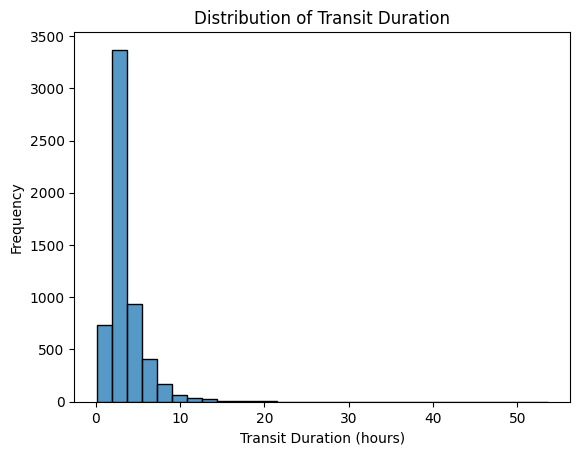

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(exoplanet_data['Transit Duration'], bins=30)
plt.title('Distribution of Transit Duration')
plt.xlabel('Transit Duration (hours)')
plt.ylabel('Frequency')
plt.show()
